In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv("C:\\Users\\ROM184\\Downloads\\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")
data.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [7]:
arrests_by_neighborhood = data.groupby('INCIDENTNEIGHBORHOOD').size()

least_arrests_neighborhood = arrests_by_neighborhood.idxmin()

# Get the count of arrests in that neighborhood
least_arrests_count = arrests_by_neighborhood.min()

# Print the result
print(f"Neighborhood with least arrests: {least_arrests_neighborhood} ({least_arrests_count} arrests)")

Neighborhood with least arrests: Mt. Oliver Neighborhood (2 arrests)


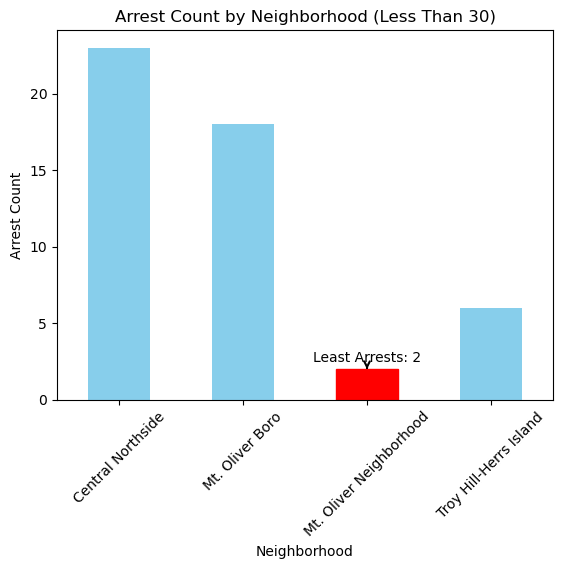

In [8]:
filtered_data = arrests_by_neighborhood[arrests_by_neighborhood < 30]

# Plot the filtered data
ax = filtered_data.plot(kind='bar', color='skyblue')

# Highlight the bar with the least arrests
least_arrest_idx = filtered_data.idxmin()  # Get index of the neighborhood with the least arrests
least_arrests_count = filtered_data.min()  # Get the count of the least arrests
ax.patches[filtered_data.index.get_loc(least_arrest_idx)].set_color('red')

plt.annotate(f'Least Arrests: {least_arrests_count}', 
             xy=(filtered_data.index.get_loc(least_arrest_idx), least_arrests_count),  # Position of the annotation
             xytext=(filtered_data.index.get_loc(least_arrest_idx), least_arrests_count + 0.5),  # Position of the text
             arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5),  # Arrow styling
             ha='center')

# Annotate the least arrest count on the graph
plt.title('Arrest Count by Neighborhood (Less Than 30)')
plt.xlabel('Neighborhood')
plt.ylabel('Arrest Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()